In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import folium
import json
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [ ]:
fatal_dataset = pd.read_csv('/content/Fatal_Collisions.csv')
fatal_dataset.shape[0]#rows and columns -shape[1]

931

In [ ]:
pd.set_option('display.max_columns', None)
fatal_dataset.head()

X             Y   INDEX_    ACCNUM  YEAR  \
0 -8.819263e+06  5.441139e+06  3363207  882024.0  2006   
1 -8.856366e+06  5.422436e+06  3363869  882497.0  2006   
2 -8.825664e+06  5.429832e+06  3363416  882174.0  2006   
3 -8.828525e+06  5.422528e+06  3363879  882501.0  2006   
4 -8.824918e+06  5.431359e+06  3371161  886230.0  2006   

                     DATE  TIME        STREET1        STREET2 OFFSET  \
0  2006/01/07 05:00:00+00  2325  STEELES AVE E  NINTH LINE ST    NaN   
1  2006/01/08 05:00:00+00  1828  ISLINGTON AVE    GOLFDOWN DR    NaN   
2  2006/01/09 05:00:00+00  1435     KENNEDY RD  GLAMORGAN AVE    NaN   
3  2006/01/11 05:00:00+00  1120     BARTLEY DR     JINNAH CRT    NaN   
4  2006/01/21 05:00:00+00  1829    MIDLAND AVE    GOODLAND GT    NaN   

       ROAD_CLASS        DISTRICT  WARDNUM   LATITUDE  LONGITUDE  \
0  Minor Arterial     Scarborough     25.0  43.842745  -79.22479   
1  Major Arterial  Etobicoke York      1.0  43.721445  -79.55809   
2  Major Arterial     Scarborough     21.0  43.769445  -79.28229   
3       Collector      North York     16.0  43.722045  -79.30799   
4  Major Arterial     Scarborough   2223.0  43.779345  -79.27559   

       LOCCOORD           ACCLOC              TRAFFCTL VISIBILITY     LIGHT  \
0     Mid-Block              NaN            No Control      Clear      Dark   
1  Intersection  At Intersection  Pedestrian Crossover      Clear      Dark   
2  Intersection  At Intersection        Traffic Signal      Clear  Daylight   
3  Intersection              NaN            No Control      Clear  Daylight   
4  Intersection  At Intersection            No Control      Clear      Dusk   

  RDSFCOND ACCLASS              IMPACTYPE     INVTYPE    INVAGE INJURY  \
0      Wet   Fatal            Approaching      Driver  50 to 54  Fatal   
1      Dry   Fatal  Pedestrian Collisions  Pedestrian  10 to 14  Fatal   
2      Dry   Fatal  Pedestrian Collisions  Pedestrian  75 to 79  Fatal   
3      Wet   Fatal              SMV Other   Passenger  15 to 19  Fatal   
4      Dry   Fatal  Pedestrian Collisions  Pedestrian  50 to 54  Fatal   

   FATAL_NO INITDIR                    VEHTYPE    MANOEUVER       DRIVACT  \
0       NaN    West  Automobile, Station Wagon  Going Ahead  Lost control   
1       NaN    East                      Other          NaN           NaN   
2       NaN    East                      Other          NaN           NaN   
3       NaN     NaN                      Other          NaN           NaN   
4       NaN    West                      Other          NaN           NaN   

  DRIVCOND                                            PEDTYPE  \
0  Unknown                                                NaN   
1      NaN         Pedestrian hit a PXO/ped. Mid-block signal   
2      NaN  Vehicle is going straight thru inter.while ped...   
3      NaN                                                NaN   
4      NaN                        Pedestrian hit at mid-block   

                           PEDACT  PEDCOND CYCLISTYPE CYCACT CYCCOND  \
0                             NaN      NaN        NaN    NaN     NaN   
1  Crossing, Pedestrian Crossover   Normal        NaN    NaN     NaN   
2   Crossing without right of way  Unknown        NaN    NaN     NaN   
3                             NaN      NaN        NaN    NaN     NaN   
4    Crossing, no Traffic Control   Normal        NaN    NaN     NaN   

  PEDESTRIAN CYCLIST AUTOMOBILE MOTORCYCLE TRUCK TRSN_CITY_VEH EMERG_VEH  \
0        NaN     NaN        Yes        NaN   NaN           NaN       NaN   
1        Yes     NaN        Yes        NaN   NaN           NaN       NaN   
2        Yes     NaN        Yes        NaN   NaN           NaN       NaN   
3        NaN     NaN        Yes        NaN   NaN           NaN       NaN   
4        Yes     NaN        Yes        NaN   NaN           NaN       NaN   

  PASSENGER SPEEDING AG_DRIV REDLIGHT ALCOHOL DISABILITY HOOD_158  \
0       NaN      NaN     NaN      NaN     NaN        NaN      144   
1       Yes      NaN 

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
fatal_dataset.iloc[:,2:]#skip latitude and longtidue

INDEX_    ACCNUM  YEAR                    DATE  TIME  \
0     3363207  882024.0  2006  2006/01/07 05:00:00+00  2325   
1     3363869  882497.0  2006  2006/01/08 05:00:00+00  1828   
2     3363416  882174.0  2006  2006/01/09 05:00:00+00  1435   
3     3363879  882501.0  2006  2006/01/11 05:00:00+00  1120   
4     3371161  886230.0  2006  2006/01/21 05:00:00+00  1829   
..        ...       ...   ...                     ...   ...   
926  80757199       NaN  2017  2017/07/22 04:00:00+00  2305   
927  80757204       NaN  2017  2017/07/31 04:00:00+00   713   
928  80780910       NaN  2017  2017/08/10 04:00:00+00  1810   
929  80757205       NaN  2017  2017/08/15 04:00:00+00   407   
930  80780915       NaN  2017  2017/08/24 04:00:00+00  2325   

                      STREET1         STREET2         OFFSET      ROAD_CLASS  \
0               STEELES AVE E   NINTH LINE ST            NaN  Minor Arterial   
1               ISLINGTON AVE     GOLFDOWN DR            NaN  Major Arterial   
2                  KENNEDY RD   GLAMORGAN AVE            NaN  Major Arterial   
3                  BARTLEY DR      JINNAH CRT            NaN       Collector   
4                 MIDLAND AVE     GOODLAND GT            NaN  Major Arterial   
..                        ...             ...            ...             ...   
926  SCARBOROUGH GOLF CLUB RD  LAWRENCE AVE E  95 m South of  Minor Arterial   
927             SHERBOURNE ST     DUNDAS ST E            NaN  Major Arterial   
928            SHEPPARD AVE E  WATER TOWER GT  30  m East of  Major Arterial   
929               DUNDAS ST E   SHERBOURNE ST   38 m East of  Major Arterial   
930         VICTORIA PARK AVE    CLINTWOOD GT            NaN  Major Arterial   

                  DISTRICT  WARDNUM   LATITUDE  LONGITUDE      LOCCOORD  \
0              Scarborough     25.0  43.842745 -79.224790     Mid-Block   
1           Etobicoke York      1.0  43.721445 -79.558090  Intersection   
2              Scarborough     21.0  43.769445 -79.282290  Intersection   
3               North York     16.0  43.722045 -79.307990  Intersection   
4              Scarborough   2223.0  43.779345 -79.275590  Intersection   
..                     ...      ...        ...        ...           ...   
926            Scarborough     24.0  43.760802 -79.215762     Mid-Block   
927  Toronto and East York     13.0  43.658221 -79.370990  Intersection   
928            Scarborough     25.0  43.803004 -79.194843  Intersection   
929  Toronto and East York     13.0  43.658351 -79.370532     Mid-Block   
930             North York   1621.0  43.748763 -79.312076  Intersection   

               ACCLOC              TRAFFCTL VISIBILITY             LIGHT  \
0                 NaN            No Control      Clear              Dark   
1     At Intersection  Pedestrian Crossover      Clear              Dark   
2     At Intersection        Traffic Signal      Clear          Daylight   
3                 NaN            No Control      Clear          Daylight   
4     At Intersection            No Control      Clear              Dusk   
..                ...                   ...        ...               ...   
926  Non Intersection            No Control      Clear  Dark, artificial   
927   At Intersection        Traffic Signal      Clear          Daylight   
928   At Intersection        Traffic Signal      Clear          Daylight   
929  Non Intersection            No Control       Rain  Dark, artificial   
930   At Intersection            No Control      Clear  Dark, artificial   

    RDSFCOND ACCLASS              IMPACTYPE     INVTYPE    INVAGE INJURY  \
0        Wet   Fatal            Approaching      Driver  50 to 54  Fatal   
1        Dry   Fatal  Pedestrian Collisions  Pedestrian  10 to 14  Fatal   
2        Dry   Fatal  Pedestrian Collisions  Pedestrian  75 to 79  Fatal   
3        Wet   Fatal              SMV Other   Passenger  15 to 19  Fatal   
4        Dry   Fatal  Pedestrian Collisions  Pedestrian  50 to 54  Fatal   
..       ...     ..

In [ ]:
print(fatal_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  931 non-null    float64
 1   Y                  931 non-null    float64
 2   INDEX_             931 non-null    int64  
 3   ACCNUM             595 non-null    float64
 4   YEAR               931 non-null    int64  
 5   DATE               931 non-null    object 
 6   TIME               931 non-null    int64  
 7   STREET1            931 non-null    object 
 8   STREET2            837 non-null    object 
 9   OFFSET             97 non-null     object 
 10  ROAD_CLASS         906 non-null    object 
 11  DISTRICT           926 non-null    object 
 12  WARDNUM            851 non-null    float64
 13  LATITUDE           931 non-null    float64
 14  LONGITUDE          931 non-null    float64
 15  LOCCOORD           931 non-null    object 
 16  ACCLOC             670 non

In [ ]:
#Interesting find in the dataset
fatal_dataset['NEIGHBOURHOOD_158'].isna().sum()#I noticed these two values dont have any null value contrary to many other columsn
fatal_dataset['NEIGHBOURHOOD_140'].isna().sum()#


0

In [ ]:
#N158 = fatal_dataset['NEIGHBOURHOOD_158'].tolist()

In [ ]:
fatal_dataset.isna().sum().sum() #lots of missing data

17649

In [ ]:
neighbourhood_counts = fatal_dataset['NEIGHBOURHOOD_158'].value_counts()
neighbourhood_counts

NEIGHBOURHOOD_158
West Humber-Clairville    34
Wexford/Maryvale          26
South Parkdale            25
Clairlea-Birchmount       20
Steeles                   17
                          ..
Princess-Rosethorn         1
Rustic                     1
Maple Leaf                 1
Pleasant View              1
Highland Creek             1
Name: count, Length: 150, dtype: int64

In [ ]:
top_n = 15
top_neighbourhoods = neighbourhood_counts.head(top_n)

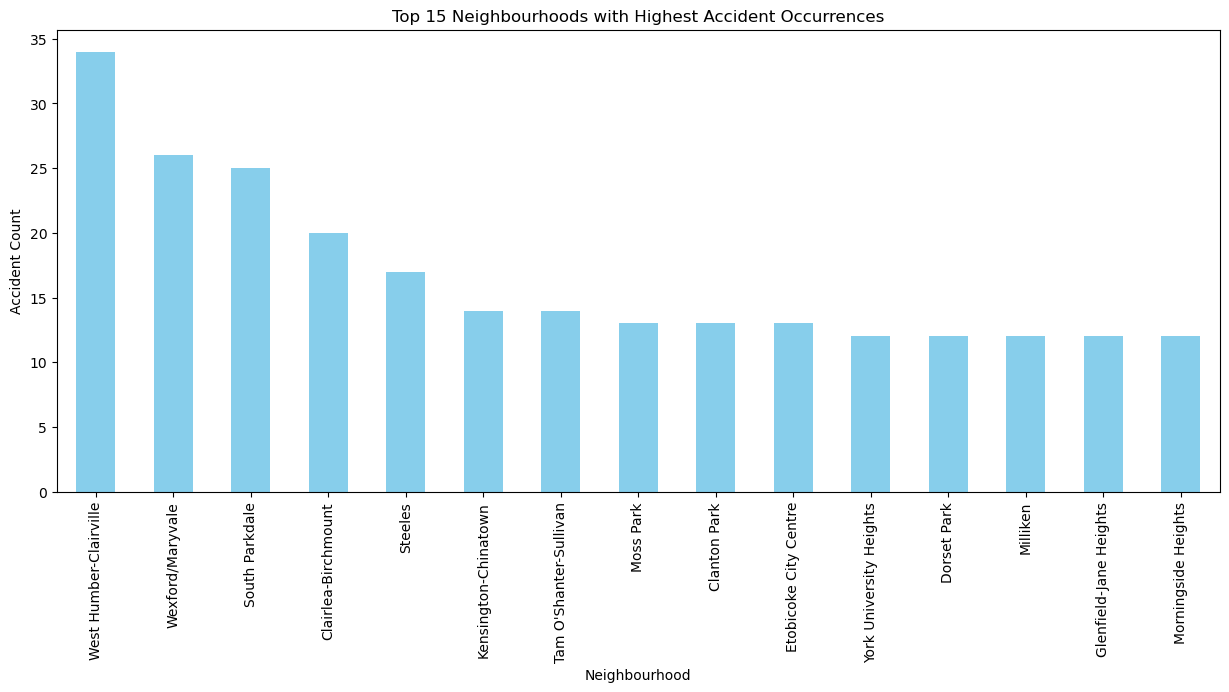

In [ ]:
# Plot the bar chart
plt.figure(figsize=(15, 6))
top_neighbourhoods.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Neighbourhoods with Highest Accident Occurrences')
plt.xlabel('Neighbourhood')
plt.ylabel('Accident Count')
plt.show()

In [ ]:
#Adding the Count of each place with accident
fatal_dataset["Count"] = fatal_dataset.groupby('NEIGHBOURHOOD_158')['NEIGHBOURHOOD_158'].transform('count')
fatal_dataset.head()

X             Y   INDEX_    ACCNUM  YEAR  \
0 -8.819263e+06  5.441139e+06  3363207  882024.0  2006   
1 -8.856366e+06  5.422436e+06  3363869  882497.0  2006   
2 -8.825664e+06  5.429832e+06  3363416  882174.0  2006   
3 -8.828525e+06  5.422528e+06  3363879  882501.0  2006   
4 -8.824918e+06  5.431359e+06  3371161  886230.0  2006   

                     DATE  TIME        STREET1        STREET2 OFFSET  \
0  2006/01/07 05:00:00+00  2325  STEELES AVE E  NINTH LINE ST    NaN   
1  2006/01/08 05:00:00+00  1828  ISLINGTON AVE    GOLFDOWN DR    NaN   
2  2006/01/09 05:00:00+00  1435     KENNEDY RD  GLAMORGAN AVE    NaN   
3  2006/01/11 05:00:00+00  1120     BARTLEY DR     JINNAH CRT    NaN   
4  2006/01/21 05:00:00+00  1829    MIDLAND AVE    GOODLAND GT    NaN   

       ROAD_CLASS        DISTRICT  WARDNUM   LATITUDE  LONGITUDE  \
0  Minor Arterial     Scarborough     25.0  43.842745  -79.22479   
1  Major Arterial  Etobicoke York      1.0  43.721445  -79.55809   
2  Major Arterial     Scarborough     21.0  43.769445  -79.28229   
3       Collector      North York     16.0  43.722045  -79.30799   
4  Major Arterial     Scarborough   2223.0  43.779345  -79.27559   

       LOCCOORD           ACCLOC              TRAFFCTL VISIBILITY     LIGHT  \
0     Mid-Block              NaN            No Control      Clear      Dark   
1  Intersection  At Intersection  Pedestrian Crossover      Clear      Dark   
2  Intersection  At Intersection        Traffic Signal      Clear  Daylight   
3  Intersection              NaN            No Control      Clear  Daylight   
4  Intersection  At Intersection            No Control      Clear      Dusk   

  RDSFCOND ACCLASS              IMPACTYPE     INVTYPE    INVAGE INJURY  \
0      Wet   Fatal            Approaching      Driver  50 to 54  Fatal   
1      Dry   Fatal  Pedestrian Collisions  Pedestrian  10 to 14  Fatal   
2      Dry   Fatal  Pedestrian Collisions  Pedestrian  75 to 79  Fatal   
3      Wet   Fatal              SMV Other   Passenger  15 to 19  Fatal   
4      Dry   Fatal  Pedestrian Collisions  Pedestrian  50 to 54  Fatal   

   FATAL_NO INITDIR                    VEHTYPE    MANOEUVER       DRIVACT  \
0       NaN    West  Automobile, Station Wagon  Going Ahead  Lost control   
1       NaN    East                      Other          NaN           NaN   
2       NaN    East                      Other          NaN           NaN   
3       NaN     NaN                      Other          NaN           NaN   
4       NaN    West                      Other          NaN           NaN   

  DRIVCOND                                            PEDTYPE  \
0  Unknown                                                NaN   
1      NaN         Pedestrian hit a PXO/ped. Mid-block signal   
2      NaN  Vehicle is going straight thru inter.while ped...   
3      NaN                                                NaN   
4      NaN                        Pedestrian hit at mid-block   

                           PEDACT  PEDCOND CYCLISTYPE CYCACT CYCCOND  \
0                             NaN      NaN        NaN    NaN     NaN   
1  Crossing, Pedestrian Crossover   Normal        NaN    NaN     NaN   
2   Crossing without right of way  Unknown        NaN    NaN     NaN   
3                             NaN      NaN        NaN    NaN     NaN   
4    Crossing, no Traffic Control   Normal        NaN    NaN     NaN   

  PEDESTRIAN CYCLIST AUTOMOBILE MOTORCYCLE TRUCK TRSN_CITY_VEH EMERG_VEH  \
0        NaN     NaN        Yes        NaN   NaN           NaN       NaN   
1        Yes     NaN        Yes        NaN   NaN           NaN       NaN   
2        Yes     NaN        Yes        NaN   NaN           NaN       NaN   
3        NaN     NaN        Yes        NaN   NaN           NaN       NaN   
4        Yes     NaN        Yes        NaN   NaN           NaN       NaN   

  PASSENGER SPEEDING AG_DRIV REDLIGHT ALCOHOL DISABILITY HOOD_158  \
0       NaN      NaN     NaN      NaN     NaN        NaN      144   
1       Yes      NaN 

In [ ]:
toronto_map = folium.Map(location=[43.70, -79.42], zoom_start=11, tiles = "cartodb positron")
geojson_data = json.load(open('toronto.geojson'))


In [ ]:
folium.Choropleth(
    geo_data=geojson_data,
    name='choropleth',
    data=fatal_dataset,
    columns=['NEIGHBOURHOOD_140', 'Count'],
    key_on='feature.properties.AREA_NAME',
    fill_color='YlOrRd',
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name='Accident Count',
    #popup=row['NEIGHBOURHOOD_140']
).add_to(toronto_map)
toronto_map.save('Choloroplethmap.html')
toronto_map

In [ ]:
#this creates the locations and pin points of each accident
#
# toronto_map
# for index, row in fatal_dataset.iterrows():
#     folium.Circle(
#     location = [row['LATITUDE'], row['LONGITUDE']],
#     radius = 5,color = 'black',
#     popup=row['NEIGHBOURHOOD_158']
#     ).add_to(toronto_map)
# toronto_map.save('mapwithpinpoints.html')
# toronto_map

In [ ]:
fatal_dataset #Project report work started from here


X             Y    INDEX_    ACCNUM  YEAR  \
0   -8.819263e+06  5.441139e+06   3363207  882024.0  2006   
1   -8.856366e+06  5.422436e+06   3363869  882497.0  2006   
2   -8.825664e+06  5.429832e+06   3363416  882174.0  2006   
3   -8.828525e+06  5.422528e+06   3363879  882501.0  2006   
4   -8.824918e+06  5.431359e+06   3371161  886230.0  2006   
..            ...           ...       ...       ...   ...   
926 -8.818258e+06  5.428500e+06  80757199       NaN  2017   
927 -8.835538e+06  5.412703e+06  80757204       NaN  2017   
928 -8.815930e+06  5.435007e+06  80780910       NaN  2017   
929 -8.835487e+06  5.412723e+06  80757205       NaN  2017   
930 -8.828980e+06  5.426645e+06  80780915       NaN  2017   

                       DATE  TIME                   STREET1         STREET2  \
0    2006/01/07 05:00:00+00  2325             STEELES AVE E   NINTH LINE ST   
1    2006/01/08 05:00:00+00  1828             ISLINGTON AVE     GOLFDOWN DR   
2    2006/01/09 05:00:00+00  1435                KENNEDY RD   GLAMORGAN AVE   
3    2006/01/11 05:00:00+00  1120                BARTLEY DR      JINNAH CRT   
4    2006/01/21 05:00:00+00  1829               MIDLAND AVE     GOODLAND GT   
..                      ...   ...                       ...             ...   
926  2017/07/22 04:00:00+00  2305  SCARBOROUGH GOLF CLUB RD  LAWRENCE AVE E   
927  2017/07/31 04:00:00+00   713             SHERBOURNE ST     DUNDAS ST E   
928  2017/08/10 04:00:00+00  1810            SHEPPARD AVE E  WATER TOWER GT   
929  2017/08/15 04:00:00+00   407               DUNDAS ST E   SHERBOURNE ST   
930  2017/08/24 04:00:00+00  2325         VICTORIA PARK AVE    CLINTWOOD GT   

            OFFSET  ... AG_DRIV REDLIGHT  ALCOHOL  DISABILITY  HOOD_158  \
0              NaN  ...     NaN      NaN      NaN         NaN       144   
1              NaN  ...     Yes      NaN      NaN         NaN         5   
2              NaN  ...     NaN      NaN      NaN         NaN       126   
3              NaN  ...     Yes      NaN      NaN         NaN        43   
4              NaN  ...     Yes      NaN      NaN         NaN       128   
..             ...  ...     ...      ...      ...         ...       ...   
926  95 m South of  ...     NaN      NaN      NaN         NaN       141   
927            NaN  ...     Yes      NaN      NaN         NaN        73   
928  30  m East of  ...     NaN      NaN      NaN         NaN       144   
929   38 m East of  ...     NaN      NaN      NaN         NaN        73   
930            NaN  ...     NaN      NaN      NaN         NaN       119   

                NEIGHBOURHOOD_158 HOOD_140  \
0             Morningside Heights      131   
1                Elms-Old Rexdale        5   
2                     Dorset Park      126   
3                Victoria Village       43   
4    Agincourt South-Malvern West      128   
..                            ...      ...   
926     Golfdale-Cedarbrae-Woburn      137   
927                     Moss Park       73   
928           Morningside Heights      131   
929                     Moss Park       73   
930              Wexford/Maryvale      119   

                      NEIGHBOURHOOD_140 DIVISION ObjectId  
0                           Rouge (131)      D42        1  
1                  Elms-Old Rexdale (5)      D23        2  
2                     Dorset Park (126)      D41        3  
3                 Victoria Village (43)      D55        4  
4    Agincourt South-Malvern West (128)      D42        5  
..                                  ...      ...      ...  
926                        Woburn (137)      D43      927  
927                      Moss Park (73)      D51      928  
928                         Rouge (131)      D42      929  
929                      Moss Park (73)      D51      930  
930              Wexford/Maryvale (119)      D41      931  

[931 rows x 57 columns]

In [ ]:
#To view the information relateed to the dataset, identified the null rate and remove anything with less than 60% accuracy
#print(fatal_dataset.info())
null_rate = round(fatal_dataset.isna().sum().sort_values(ascending=False) / len(fatal_dataset) * 100, 2)
null_rate
fatal_dataset.drop(null_rate[null_rate > 60].index, axis = 1, inplace = True)

In [ ]:

#fatal_dataset = fatal_dataset.drop(columns=['DATE'])
#i dropped all the categories with a lot of unique values
dropping_columns = ['X','Y','INDEX_','STREET1','STREET2','LATITUDE','LONGITUDE','NEIGHBOURHOOD_140','ObjectId','INVAGE','WARDNUM','ACCLOC','ACCLASS','INJURY','FATAL_NO','DIVISION','ACCNUM','NEIGHBOURHOOD_158','HOOD_140','HOOD_158']
fatal_dataset.drop(columns=dropping_columns,axis=1,inplace=True)


In [ ]:
uniquevalues = fatal_dataset.nunique()
print(uniquevalues)

#To get an idea of the unique values within an attribute
#fatal_dataset['LOCCOORD'].value_counts()

YEAR           17
DATE          846
TIME          629
ROAD_CLASS      7
DISTRICT        4
LOCCOORD        5
TRAFFCTL        5
VISIBILITY      7
LIGHT           9
RDSFCOND        7
IMPACTYPE      10
INVTYPE         9
INITDIR         5
VEHTYPE         9
PEDTYPE        15
PEDACT         14
PEDCOND         8
PEDESTRIAN      1
AUTOMOBILE      1
AG_DRIV         1
dtype: int64


In [ ]:
#second set of dropping columns because they went 10 above
dropping_columns2 = ['PEDTYPE','PEDACT','TIME','DATE']
fatal_dataset.drop(columns=dropping_columns2,axis=1,inplace=True)

In [ ]:
#had to drop thses columns
#fatal_dataset['PEDTYPE'].value_counts()
#fatal_dataset['PEDACT'].value_counts()
#fatal_dataset['Count'].value_counts()
#fatal_dataset['IMPACTYPE'].value_counts()

In [ ]:
data_types = fatal_dataset.dtypes
data_types_df = pd.DataFrame({'Attribute': data_types.index, 'Data Type': data_types.values})
# Print or display the result
print(data_types_df)


     Attribute Data Type
0         YEAR     int64
1   ROAD_CLASS    object
2     DISTRICT    object
3     LOCCOORD    object
4     TRAFFCTL    object
5   VISIBILITY    object
6        LIGHT    object
7     RDSFCOND    object
8    IMPACTYPE    object
9      INVTYPE    object
10     INITDIR    object
11     VEHTYPE    object
12     PEDCOND    object
13  PEDESTRIAN    object
14  AUTOMOBILE    object
15     AG_DRIV    object


In [ ]:
#counted the null values within whatever was remaining
nancount = fatal_dataset.isnull().sum()
print(nancount)
#3rd set of dropping of colmns based on null vlaues in the attribute
dropping_columns3 = ['PEDESTRIAN','PEDCOND','VEHTYPE']
fatal_dataset.drop(columns=dropping_columns3,axis=1,inplace=True)
fatal_dataset.drop(columns='AUTOMOBILE',axis=1,inplace=True)

YEAR            0
ROAD_CLASS     25
DISTRICT        5
LOCCOORD        0
TRAFFCTL        2
VISIBILITY     10
LIGHT           0
RDSFCOND       11
IMPACTYPE       1
INVTYPE         0
INITDIR       110
VEHTYPE       391
PEDCOND       422
PEDESTRIAN    414
AUTOMOBILE    154
AG_DRIV       504
dtype: int64


In [ ]:
#after dropping
nancount = fatal_dataset.isnull().sum()
print(nancount)
data_types = fatal_dataset.dtypes
data_types_df = pd.DataFrame({'Attribute': data_types.index, 'Data Type': data_types.values})
# Print or display the result
print(data_types_df)

YEAR            0
ROAD_CLASS     25
DISTRICT        5
LOCCOORD        0
TRAFFCTL        2
VISIBILITY     10
LIGHT           0
RDSFCOND       11
IMPACTYPE       1
INVTYPE         0
INITDIR       110
AG_DRIV       504
dtype: int64
     Attribute Data Type
0         YEAR     int64
1   ROAD_CLASS    object
2     DISTRICT    object
3     LOCCOORD    object
4     TRAFFCTL    object
5   VISIBILITY    object
6        LIGHT    object
7     RDSFCOND    object
8    IMPACTYPE    object
9      INVTYPE    object
10     INITDIR    object
11     AG_DRIV    object


In [ ]:
fatal_dataset['RDSFCOND'].value_counts()

Dry            729
Wet            157
Other           21
Packed Snow      4
Loose Snow       4
Slush            4
Ice              1
Name: RDSFCOND, dtype: int64

In [ ]:
fatal_dataset.loc[(fatal_dataset['YEAR'] >= 2006) & (fatal_dataset['YEAR'] < 2010),'YEARS'] = '06~10'
fatal_dataset.loc[(fatal_dataset['YEAR'] >= 2010) & (fatal_dataset['YEAR'] < 2014),'YEARS'] = '10~14'
fatal_dataset.loc[(fatal_dataset['YEAR'] >= 2014) & (fatal_dataset['YEAR'] < 2018),'YEARS'] = '14~18'
fatal_dataset.loc[(fatal_dataset['YEAR'] >= 2018) & (fatal_dataset['YEAR'] < 2022),'YEARS'] = '18~22'



In [ ]:
fatal_dataset.drop('YEAR',axis=1,inplace=True)

In [ ]:
fatal_dataset

ROAD_CLASS               DISTRICT      LOCCOORD  \
0    Minor Arterial            Scarborough     Mid-Block   
1    Major Arterial         Etobicoke York  Intersection   
2    Major Arterial            Scarborough  Intersection   
3         Collector             North York  Intersection   
4    Major Arterial            Scarborough  Intersection   
..              ...                    ...           ...   
926  Minor Arterial            Scarborough     Mid-Block   
927  Major Arterial  Toronto and East York  Intersection   
928  Major Arterial            Scarborough  Intersection   
929  Major Arterial  Toronto and East York     Mid-Block   
930  Major Arterial             North York  Intersection   

                 TRAFFCTL VISIBILITY             LIGHT RDSFCOND  \
0              No Control      Clear              Dark      Wet   
1    Pedestrian Crossover      Clear              Dark      Dry   
2          Traffic Signal      Clear          Daylight      Dry   
3              No Control      Clear          Daylight      Wet   
4              No Control      Clear              Dusk      Dry   
..                    ...        ...               ...      ...   
926            No Control      Clear  Dark, artificial      Dry   
927        Traffic Signal      Clear          Daylight      Dry   
928        Traffic Signal      Clear          Daylight      Dry   
929            No Control       Rain  Dark, artificial      Wet   
930            No Control      Clear  Dark, artificial      Dry   

                 IMPACTYPE     INVTYPE  INITDIR AG_DRIV  YEARS  
0              Approaching      Driver     West     NaN  06~10  
1    Pedestrian Collisions  Pedestrian     East     Yes  06~10  
2    Pedestrian Collisions  Pedestrian     East     NaN  06~10  
3                SMV Other   Passenger      NaN     Yes  06~10  
4    Pedestrian Collisions  Pedestrian     West     Yes  06~10  
..                     ...         ...      ...     ...    ...  
926  Pedestrian Collisions  Pedestrian     East     NaN  14~18  
927  Pedestrian Collisions  Pedestrian  Unknown     Yes  14~18  
928               Rear End      Driver     West     NaN  14~18  
929  Pedestrian Collisions  Pedestrian  Unknown     NaN  14~18  
930  Pedestrian Collisions  Pedestrian  Unknown     NaN  14~18  

[931 rows x 12 columns]

In [ ]:
uniquevalues = fatal_dataset.nunique()
print(uniquevalues)

ROAD_CLASS     7
DISTRICT       4
LOCCOORD       5
TRAFFCTL       5
VISIBILITY     7
LIGHT          9
RDSFCOND       7
IMPACTYPE     10
INVTYPE        9
INITDIR        5
AG_DRIV        1
YEARS          4
dtype: int64


In [ ]:
fatal_dataset['INITDIR'].value_counts()

North      189
East       186
West       184
South      179
Unknown     83
Name: INITDIR, dtype: int64

In [ ]:
string_attributes = fatal_dataset.select_dtypes(include=['object']).columns
string_attributes

Index(['ROAD_CLASS', 'DISTRICT', 'LOCCOORD', 'TRAFFCTL', 'VISIBILITY', 'LIGHT',
       'RDSFCOND', 'IMPACTYPE', 'INVTYPE', 'INITDIR', 'AG_DRIV', 'YEARS'],
      dtype='object')

In [ ]:
fatal_dataset

ROAD_CLASS               DISTRICT      LOCCOORD  \
0    Minor Arterial            Scarborough     Mid-Block   
1    Major Arterial         Etobicoke York  Intersection   
2    Major Arterial            Scarborough  Intersection   
3         Collector             North York  Intersection   
4    Major Arterial            Scarborough  Intersection   
..              ...                    ...           ...   
926  Minor Arterial            Scarborough     Mid-Block   
927  Major Arterial  Toronto and East York  Intersection   
928  Major Arterial            Scarborough  Intersection   
929  Major Arterial  Toronto and East York     Mid-Block   
930  Major Arterial             North York  Intersection   

                 TRAFFCTL VISIBILITY             LIGHT RDSFCOND  \
0              No Control      Clear              Dark      Wet   
1    Pedestrian Crossover      Clear              Dark      Dry   
2          Traffic Signal      Clear          Daylight      Dry   
3              No Control      Clear          Daylight      Wet   
4              No Control      Clear              Dusk      Dry   
..                    ...        ...               ...      ...   
926            No Control      Clear  Dark, artificial      Dry   
927        Traffic Signal      Clear          Daylight      Dry   
928        Traffic Signal      Clear          Daylight      Dry   
929            No Control       Rain  Dark, artificial      Wet   
930            No Control      Clear  Dark, artificial      Dry   

                 IMPACTYPE     INVTYPE  INITDIR AG_DRIV  YEARS  
0              Approaching      Driver     West     NaN  06~10  
1    Pedestrian Collisions  Pedestrian     East     Yes  06~10  
2    Pedestrian Collisions  Pedestrian     East     NaN  06~10  
3                SMV Other   Passenger      NaN     Yes  06~10  
4    Pedestrian Collisions  Pedestrian     West     Yes  06~10  
..                     ...         ...      ...     ...    ...  
926  Pedestrian Collisions  Pedestrian     East     NaN  14~18  
927  Pedestrian Collisions  Pedestrian  Unknown     Yes  14~18  
928               Rear End      Driver     West     NaN  14~18  
929  Pedestrian Collisions  Pedestrian  Unknown     NaN  14~18  
930  Pedestrian Collisions  Pedestrian  Unknown     NaN  14~18  

[931 rows x 12 columns]

In [ ]:
nominal_columns = ['ROAD_CLASS','DISTRICT','LOCCOORD','TRAFFCTL','VISIBILITY','LIGHT','RDSFCOND','IMPACTYPE','INVTYPE','INITDIR','YEARS']
fd_binary = pd.get_dummies(fatal_dataset,columns=nominal_columns)
fd_binary


AG_DRIV  ROAD_CLASS_Collector  ROAD_CLASS_Expressway  \
0       NaN                     0                      0   
1       Yes                     0                      0   
2       NaN                     0                      0   
3       Yes                     1                      0   
4       Yes                     0                      0   
..      ...                   ...                    ...   
926     NaN                     0                      0   
927     Yes                     0                      0   
928     NaN                     0                      0   
929     NaN                     0                      0   
930     NaN                     0                      0   

     ROAD_CLASS_Expressway Ramp  ROAD_CLASS_Laneway  ROAD_CLASS_Local  \
0                             0                   0                 0   
1                             0                   0                 0   
2                             0                   0                 0   
3                             0                   0                 0   
4                             0                   0                 0   
..                          ...                 ...               ...   
926                           0                   0                 0   
927                           0                   0                 0   
928                           0                   0                 0   
929                           0                   0                 0   
930                           0                   0                 0   

     ROAD_CLASS_Major Arterial  ROAD_CLASS_Minor Arterial  \
0                            0                          1   
1                            1                          0   
2                            1                          0   
3                            0                          0   
4                            1                          0   
..                         ...                        ...   
926                          0                          1   
927                          1                          0   
928                          1                          0   
929                          1                          0   
930                          1                          0   

     DISTRICT_Etobicoke York  DISTRICT_North York  ...  INVTYPE_Wheelchair  \
0                          0                    0  ...                   0   
1                          1                    0  ...                   0   
2                          0                    0  ...                   0   
3                          0                    1  ...                   0   
4                          0                    0  ...                   0   
..                       ...                  ...  ...                 ...   
926                        0                    0  ...                   0   
927                        0                    0  ...                   0   
928                        0                    0  ...                   0   
929                        0                    0  ...                   0   
930                        0                    1  ...                   0   

     INITDIR_East  INITDIR_North  INITDIR_South  INITDIR_Unknown  \
0               0              0              0                0   
1               1              0              0                0   
2               1              0              0                0   
3               0              0              0                0   
4               0              0              0                0   
..            ...            ...            ...              ...   
926             1              0              0                0   
927             0              0              0                1   
928             0              0              0                0   
929             0              0              0         

In [ ]:
fd_binary.corr()

<ipython-input-67-13efd5497937>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fd_binary.corr()


ROAD_CLASS_Collector  ROAD_CLASS_Expressway  \
ROAD_CLASS_Collector                    1.000000              -0.025344   
ROAD_CLASS_Expressway                  -0.025344               1.000000   
ROAD_CLASS_Expressway Ramp             -0.007976              -0.003417   
ROAD_CLASS_Laneway                     -0.013829              -0.005925   
ROAD_CLASS_Local                       -0.058553              -0.025085   
...                                          ...                    ...   
INITDIR_West                            0.043728               0.052952   
YEARS_06~10                             0.058985              -0.056236   
YEARS_10~14                             0.043728              -0.051715   
YEARS_14~18                            -0.003709              -0.064344   
YEARS_18~22                            -0.063404               0.109434   

                            ROAD_CLASS_Expressway Ramp  ROAD_CLASS_Laneway  \
ROAD_CLASS_Collector                         -0.007976           -0.013829   
ROAD_CLASS_Expressway                        -0.003417           -0.005925   
ROAD_CLASS_Expressway Ramp                    1.000000           -0.001864   
ROAD_CLASS_Laneway                           -0.001864            1.000000   
ROAD_CLASS_Local                             -0.007894           -0.013688   
...                                                ...                 ...   
INITDIR_West                                 -0.016274           -0.028219   
YEARS_06~10                                  -0.017697           -0.030685   
YEARS_10~14                                  -0.016274            0.019375   
YEARS_14~18                                  -0.020249            0.007286   
YEARS_18~22                                   0.057247            0.011375   

                            ROAD_CLASS_Local  ROAD_CLASS_Major Arterial  \
ROAD_CLASS_Collector               -0.058553                  -0.371817   
ROAD_CLASS_Expressway              -0.025085                  -0.159291   
ROAD_CLASS_Expressway Ramp         -0.007894                  -0.050128   
ROAD_CLASS_Laneway                 -0.013688                  -0.086918   
ROAD_CLASS_Local                    1.000000                  -0.368015   
...                                      ...                        ...   
INITDIR_West                       -0.048357                  -0.028611   
YEARS_06~10                        -0.028277                  -0.017209   
YEARS_10~14                        -0.000942                  -0.040386   
YEARS_14~18                         0.041408                  -0.010399   
YEARS_18~22                        -0.017504                   0.059396   

                            ROAD_CLASS_Minor Arterial  \
ROAD_CLASS_Collector                        -0.101032   
ROAD_CLASS_Expressway                       -0.043283   
ROAD_CLASS_Expressway Ramp                  -0.013621   
ROAD_CLASS_Laneway                          -0.023618   
ROAD_CLASS_Local                            -0.099999   
...                                               ...   
INITDIR_West                                 0.014647   
YEARS_06~10                                 -0.035563   
YEARS_10~14                                  0.029875   
YEARS_14~18                                  0.028361   
YEARS_18~22                                 -0.027033   

                            DISTRICT_Etobicoke York  DISTRICT_North York  \
ROAD_CLASS_Collector                       0.006590            -0.002576   
ROAD_CLASS_Expressway                     -0.009403            -0.004026   
ROAD_CLASS_Expressway Ramp                 0.058601            -0.017207   
ROAD_CLASS_Laneway                        -0.031816            -0.029835   
ROAD_CLASS_Local                          -0.001785             0.080185   
...                                             ...                  ...   
INITDIR_West                              -0.024530             0.034581

<ipython-input-28-0b221d8a08de>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fd_binary.corr(), annot=False, cmap="coolwarm", linewidths=.5)


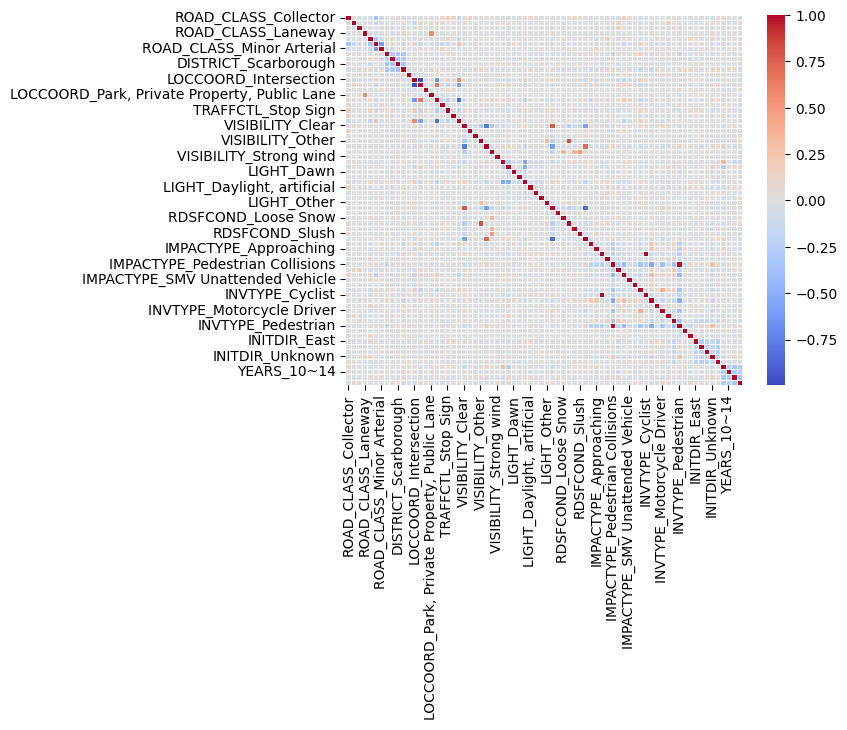

In [ ]:
sns.heatmap(fd_binary.corr(), annot=False, cmap="coolwarm", linewidths=.5)
plt.show()


In [ ]:
fatal_dataset['INITDIR'].value_counts()

North      189
East       186
West       184
South      179
Unknown     83
Name: INITDIR, dtype: int64

In [ ]:
#going to predic the AGG_drive column
X = fd_binary.drop('AG_DRIV', axis = 1)
y = fd_binary.AG_DRIV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=11, stratify=y)

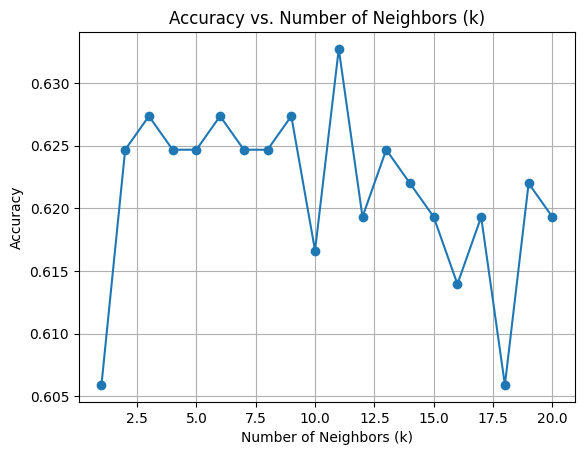

In [ ]:
k_values = list(range(1, 21))  # You can adjust the range as needed
accuracy_values = []

# Loop through different values of k and train the model
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plot the accuracy values for different values of k
plt.plot(k_values, accuracy_values, marker='o')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [ ]:
##The Best accuracy was found out in ariund 11.0 neighbours

In [ ]:
#PERFORMING KNN TO CLASSIFY AG_DRIVE
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6327077747989276
              precision    recall  f1-score   support

          No       0.66      0.68      0.67       202
         Yes       0.60      0.58      0.59       171

    accuracy                           0.63       373
   macro avg       0.63      0.63      0.63       373
weighted avg       0.63      0.63      0.63       373



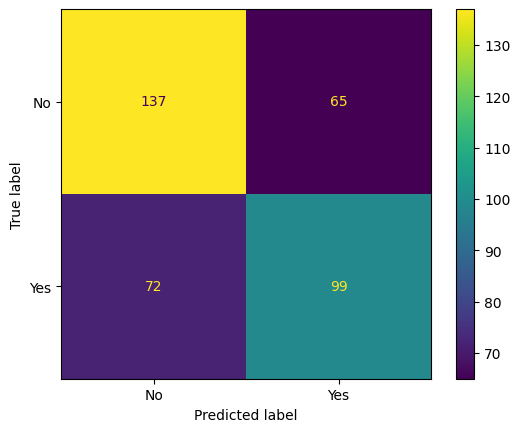

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

In [ ]:
#these are for the DIRECTION PREDICTION IN THE ACCIDENTS
nominal_columns_2 = ['ROAD_CLASS','DISTRICT','LOCCOORD','TRAFFCTL','VISIBILITY','LIGHT','RDSFCOND','IMPACTYPE','INVTYPE','AG_DRIV','YEARS']
dir_binary = pd.get_dummies(fatal_dataset,columns=nominal_columns_2)
dir_binary
#so the values of INTDIR is still NaN
#plt.figure(figsize=(10, 10))
#sns.heatmap(dir_binary.corr(), annot=False, cmap="coolwarm", linewidths=.8)
#plt.show()

INITDIR  ROAD_CLASS_Collector  ROAD_CLASS_Expressway  \
0       West                     0                      0   
1       East                     0                      0   
2       East                     0                      0   
3        NaN                     1                      0   
4       West                     0                      0   
..       ...                   ...                    ...   
926     East                     0                      0   
927  Unknown                     0                      0   
928     West                     0                      0   
929  Unknown                     0                      0   
930  Unknown                     0                      0   

     ROAD_CLASS_Expressway Ramp  ROAD_CLASS_Laneway  ROAD_CLASS_Local  \
0                             0                   0                 0   
1                             0                   0                 0   
2                             0                   0                 0   
3                             0                   0                 0   
4                             0                   0                 0   
..                          ...                 ...               ...   
926                           0                   0                 0   
927                           0                   0                 0   
928                           0                   0                 0   
929                           0                   0                 0   
930                           0                   0                 0   

     ROAD_CLASS_Major Arterial  ROAD_CLASS_Minor Arterial  \
0                            0                          1   
1                            1                          0   
2                            1                          0   
3                            0                          0   
4                            1                          0   
..                         ...                        ...   
926                          0                          1   
927                          1                          0   
928                          1                          0   
929                          1                          0   
930                          1                          0   

     DISTRICT_Etobicoke York  DISTRICT_North York  ...  \
0                          0                    0  ...   
1                          1                    0  ...   
2                          0                    0  ...   
3                          0                    1  ...   
4                          0                    0  ...   
..                       ...                  ...  ...   
926                        0                    0  ...   
927                        0                    0  ...   
928                        0                    0  ...   
929                        0                    0  ...   
930                        0                    1  ...   

     INVTYPE_Motorcycle Passenger  INVTYPE_Passenger  INVTYPE_Pedestrian  \
0                               0                  0                   0   
1                               0                  0                   1   
2                               0                  0                   1   
3                               0                  1                   0   
4                               0                  0                   1   
..                            ...                ...                 ...   
926                             0                  0                   1   
927                             0                  0                   1   
928                             0                  0                   0   
929                             0                  0                   1   
930                             0                  0                   1   

     INVTYPE_Truck Driver  INVTYPE_Wheelchair  AG_DR

In [ ]:
#converting unknown to NaN
dir_binary['INITDIR'].value_counts()
dir_binary['INITDIR'].replace('Unknown', 'NaN', inplace=True)
#dir_binary['INITDIR'].replace('NaN', 0, inplace=True)
dir_binary['INITDIR'].value_counts()
#dir_binary['INITDIR'].head(25)

North    189
East     186
West     184
South    179
0         83
Name: INITDIR, dtype: int64

In [ ]:
valid_values=['North','South','East','West']
dir_binary['INITDIR'] = dir_binary['INITDIR'].mask(~dir_binary['INITDIR'].isin(valid_values), pd.NA)
dir_binary['INITDIR'].value_counts()

North    189
East     186
West     184
South    179
Name: INITDIR, dtype: int64

In [ ]:
target_attribute = ['INITDIR']

In [ ]:
# Separate the dataset into two sets: one with known values and one with unknown values
#known_values_df = dir_binary[dir_binary[target_attribute].notna().any(axis=1)]
#unknown_values_df = dir_binary[dir_binary[target_attribute].isna().any(axis=1)]


In [ ]:
#features = known_values_df.drop(target_attribute, axis=1)

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(
 #   features,
  #  known_values_df[target_attribute],
   # test_size=0.2,
    #random_state=42
#)

# Create a KNN classifier with k=3 (you can adjust k as needed)
#knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
#knn_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
#unknown_values_features = unknown_values_df.drop(target_attribute, axis=1)
#predicted_values = knn_classifier.predict(unknown_values_features)

# Update the DataFrame with the predicted values
#unknown_values_df[target_attribute] = predicted_values

# Concatenate the known and predicted values back into a single DataFrame
#dir_binary_predicted = pd.concat([known_values_df, unknown_values_df])

# Evaluate the accuracy on the test set (optional)
#y_pred = knn_classifier.predict(X_test)
#accuracy = accuracy_score(y_test, y_pred)
#print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.2702702702702703


In [1]:
#cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
#plt.figure(figsize=(8, 6))
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
#plt.title('Confusion Matrix')
#plt.xlabel('Predicted')
#plt.ylabel('True')
#plt.show()